In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Factor Analysis

In [2]:
# Load the data
df = pd.read_excel('../data/factor_data.xlsx')
df = df.dropna()    
len(df)

108

In [3]:
df.head()

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,Neutral,Somewhat Important,Neutral,Not important,Less Important,Somewhat Important
1,Not important,Not important,Not important,Not important,Not important,Not important
2,Somewhat Important,Neutral,Neutral,Neutral,Somewhat Important,Somewhat Important
3,Very Important,Somewhat Important,Neutral,Very Important,Neutral,Neutral
4,Not important,Less Important,Neutral,Neutral,Neutral,Very Important


In [4]:
# Define the mapping
mapping = {
    'Not important': 1,
    'Less Important': 2,
    'Neutral': 3,
    'Somewhat Important': 4,
    'Very Important': 5
}

# Apply the mapping to the dataframe
df_encoded = df.replace(mapping)
df_encoded.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_17260\2429106695.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df.replace(mapping)


,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,3,4,3,1,2,4
1,1,1,1,1,1,1
2,4,3,3,3,4,4
3,5,4,3,5,3,3
4,1,2,3,3,3,5


In [5]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap using Plotly
fig = px.imshow(correlation_matrix, 
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='Viridis')

fig.update_layout(title='Factor Analysis-Correlation Matrix Heatmap')
fig.show()

In [6]:
correlation_matrix

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
Nutritional value,1.000000,0.478075,0.353143,0.229521,0.581957,0.216679
Shelf-life,0.478075,1.000000,0.638757,0.235225,0.530905,0.434934
Price,0.353143,0.638757,1.000000,0.075174,0.530117,0.495576
Packaging design,0.229521,0.235225,0.075174,1.000000,0.283443,0.167748
Brand trust,0.581957,0.530905,0.530117,0.283443,1.000000,0.467540
Convenience,0.216679,0.434934,0.495576,0.167748,0.467540,1.000000


In [7]:
import factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(df_encoded)

In [8]:
kmo_model

0.7689987309414882

In [9]:
kmo_vars

array([0.73993418, 0.7859535 , 0.7486832 , 0.71660655, 0.77573802,
       0.81452633])

In [10]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(df_encoded)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  202.78815294089944
p value :  5.761399593930615e-35


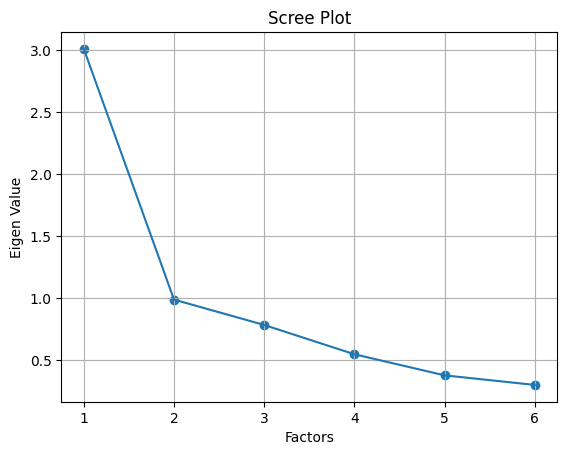

In [11]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df_encoded.shape[1])
fa.fit(df_encoded)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,df_encoded.shape[1]+1),ev)
plt.plot(range(1,df_encoded.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [12]:
ev

array([3.00909122, 0.98711575, 0.78246417, 0.54639694, 0.37602061,
       0.29891131])

In [13]:
#rotated_component_matrix
fa = FactorAnalyzer(n_factors=2,rotation='varimax')
fa.fit(df_encoded)
print(pd.DataFrame(fa.loadings_,index=df_encoded.columns))

                          0         1
Nutritional value  0.268014  0.621711
Shelf-life         0.586899  0.459429
Price              0.987567  0.120331
Packaging design   0.053093  0.381088
Brand trust        0.447666  0.705623
Convenience        0.479686  0.287199


In [14]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1
Variance          1.824893  1.337694
Proportional Var  0.304149  0.222949
Cumulative Var    0.304149  0.527098


In [15]:
print(pd.DataFrame(fa.get_communalities(),index=df_encoded.columns,columns=['Communalities']))

                   Communalities
Nutritional value       0.458356
Shelf-life              0.555525
Price                   0.989768
Packaging design        0.148047
Brand trust             0.698309
Convenience             0.312582


In [16]:
rotated_component_matrix = pd.DataFrame(fa.loadings_, index=df_encoded.columns)
print(rotated_component_matrix)

                          0         1
Nutritional value  0.268014  0.621711
Shelf-life         0.586899  0.459429
Price              0.987567  0.120331
Packaging design   0.053093  0.381088
Brand trust        0.447666  0.705623
Convenience        0.479686  0.287199
